In [2]:
# Экспорт в svg активируется так

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# set_matplotlib_formats('png') по умолчанию стоит

---

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [11]:
sns.set_style('whitegrid')

# Pandas profiling

In [5]:
from pandas_profiling import ProfileReport

In [6]:
df = sns.load_dataset('tips')

In [7]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
74,14.73,2.20,Female,No,Sat,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4
27,12.69,2.00,Male,No,Sat,Dinner,2
130,19.08,1.50,Male,No,Thur,Lunch,2
100,11.35,2.50,Female,Yes,Fri,Dinner,2


In [ ]:
ProfileReport(df, minimal=True)

---

## Используем _, чтобы не захламлять пространство имен

In [16]:
_ = 12

In [18]:
_

12

In [19]:
def f():
    return 1,2,3,4,2

In [21]:
first, *_ = f()
print(first)

1


# Визуализация

In [22]:
import pandas as pd

## Сравнение нескольких гистограмм на одной графике

In [23]:
df = pd.concat([df[['tip']], df[['tip']]*2])

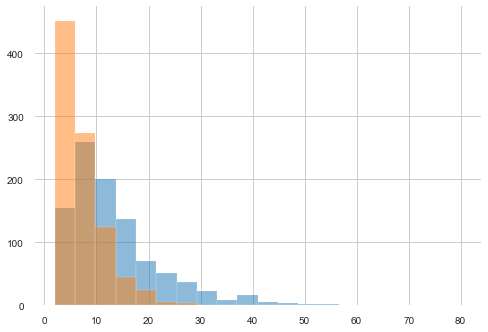

In [24]:
_, bins, _ = plt.hist(2*df['tip'], bins=20, alpha=0.5)
plt.hist(df['tip'], bins=bins, alpha=0.5);


## Подписываем графики

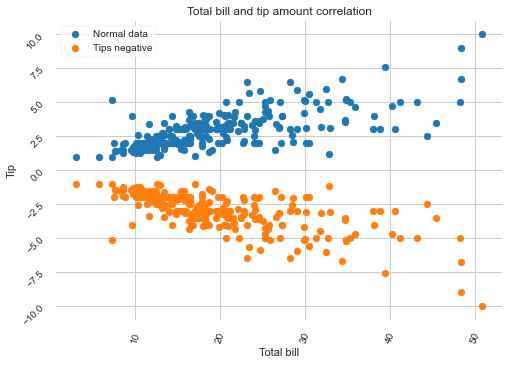

In [39]:
plt.scatter(df['total_bill'], df['tip'], label='Normal data')
plt.scatter(df['total_bill'], -df['tip'], label='Tips negative')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Total bill and tip amount correlation')
plt.legend()

plt.xticks(rotation=70)
plt.tick_params(axis='y', labelrotation=45)


### Строим несколько графиков на одной картинке

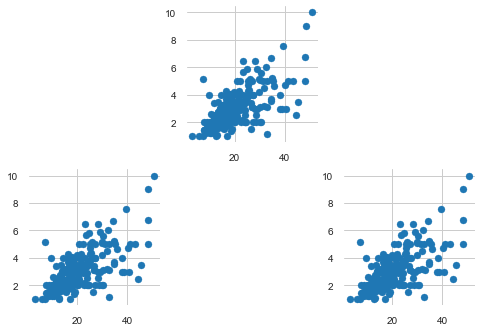

In [69]:
# Не советую использовать

plt.subplot(232)
plt.scatter(df['total_bill'], df['tip'])
plt.subplot(234)
plt.scatter(df['total_bill'], df['tip'])
plt.subplot(236)
plt.scatter(df['total_bill'], df['tip'])


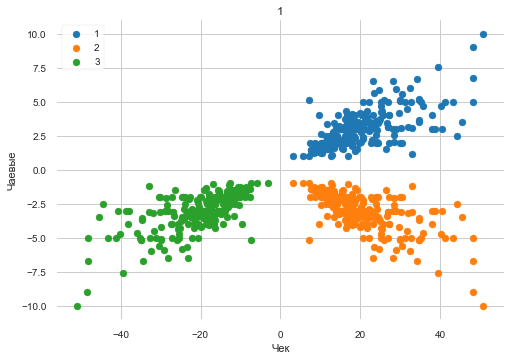

In [41]:
plt.scatter(df['total_bill'], df['tip'], label='1')
plt.scatter(df['total_bill'], -df['tip'], label='2')
plt.scatter(-df['total_bill'], -df['tip'], label='3')
plt.legend()

plt.xlabel('Чек')
plt.ylabel('Чаевые')
plt.title('1')

plt.show()  # .show() – команда-отсечка
# plt.figure() – вызов plt.figure() – альтернативный способ бросить текущий график и сделать новый

plt.scatter(df['total_bill'], df['tip'], label='1')
plt.scatter(df['total_bill'], -df['tip'], label='2')
plt.scatter(-df['total_bill'], -df['tip'], label='3')
plt.legend()

plt.xlabel('Чек')
plt.ylabel('Чаевые')
plt.title('2')
# plt.show()

plt.savefig('1.png')
plt.close()


## Несколько графиков рядом

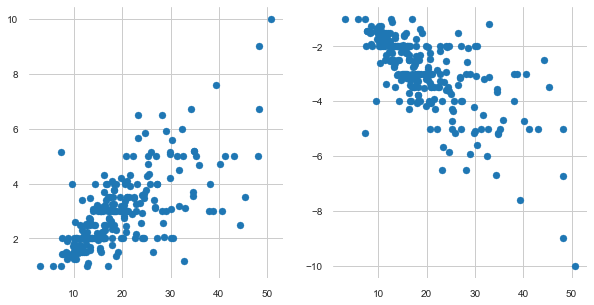

In [71]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(df['total_bill'], df['tip'])
axs[1].scatter(df['total_bill'], -df['tip'])

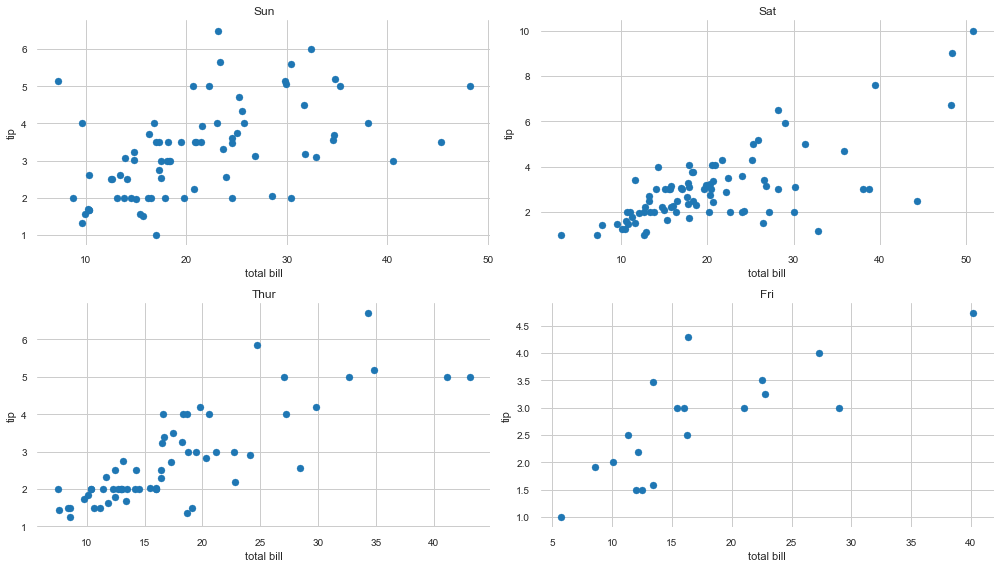

In [72]:
_, axs = plt.subplots(2, 2, figsize=(14, 8))
axs = axs.ravel()    # распрямляем массив в одномерный, чтобы было проще индексироваться

for i, day in enumerate(df['day'].unique()):
    df_part = df.loc[df['day'] == day]
    axs[i].scatter(df_part['total_bill'], df_part['tip'])
    axs[i].set_xlabel('total bill')
    axs[i].set_ylabel('tip')
    axs[i].set_title(day)

plt.tight_layout()

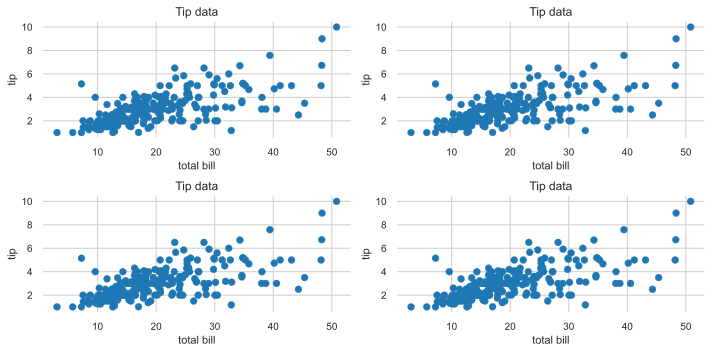

In [56]:
_, axs = plt.subplots(2, 2, figsize=(10, 5))
# axs = axs.ravel()

for i in range(4):
    x = i // 2  # ужас!
    y = i % 2   # ужас!
    axs[x][y].scatter(df['total_bill'], df['tip'])
    axs[x][y].set_xlabel('total bill')
    axs[x][y].set_ylabel('tip')
    axs[x][y].set_title('Tip data')

plt.tight_layout() 

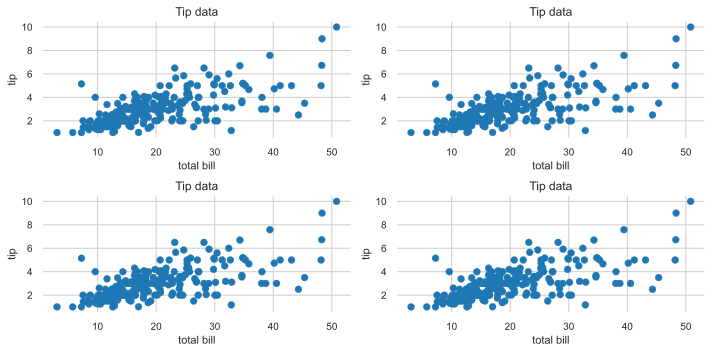

In [55]:
_, axs = plt.subplots(2, 2, figsize=(10, 5))
axs = axs.ravel()

for i in range(4):
#     x = i // 2  # ужас!
#     y = i % 2   # ужас!
    axs[i].scatter(df['total_bill'], df['tip'])
    axs[i].set_xlabel('total bill')
    axs[i].set_ylabel('tip')
    axs[i].set_title('Tip data')

plt.tight_layout() 

## Шарим оси с другим графиком

In [74]:
b = np.random.rand(1000)*960 + 10

b2 = b[b > 200]

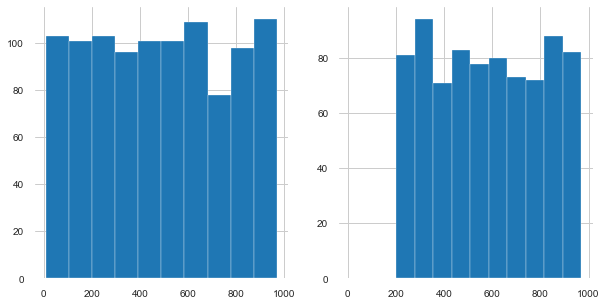

In [75]:
_, axs = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

axs[0].hist(b);
axs[1].hist(b2);


## Строим графики с категориальными величинами

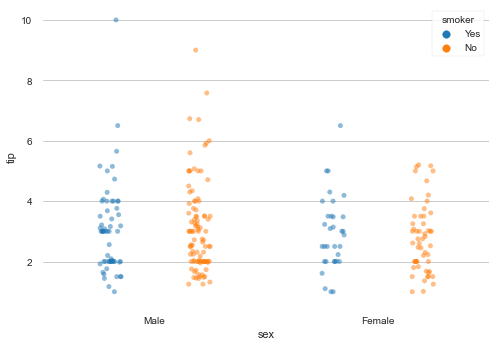

In [76]:
sns.stripplot(x="sex", 
              y="tip", 
              hue="smoker",
              data=df, 
              dodge=True, 
              alpha=.5)


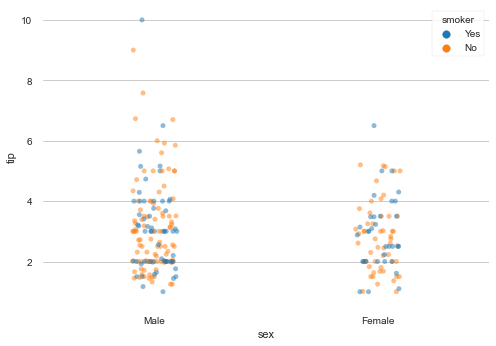

In [77]:
sns.stripplot(x="sex", 
              y="tip", 
              hue="smoker",
              data=df, 
              dodge=False, 
              alpha=.5)


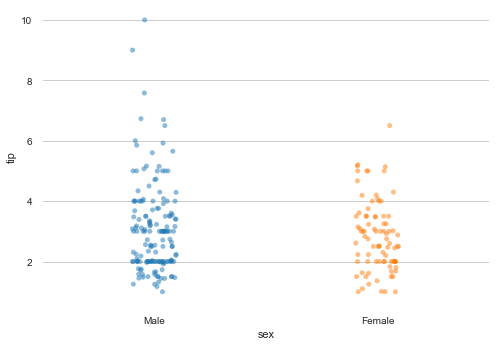

In [78]:
sns.stripplot(x="sex", 
              y="tip", 
#               hue="smoker",
              data=df, 
              jitter=True,
#               dodge=True, 
              alpha=.5)


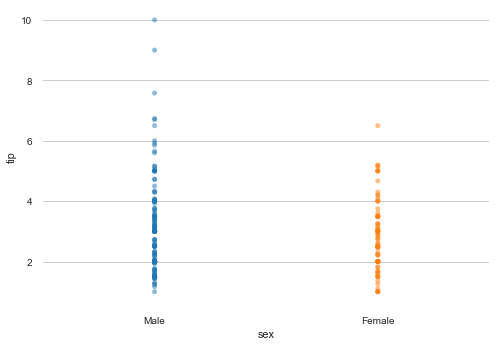

In [80]:
sns.stripplot(x="sex", 
              y="tip", 
#               hue="smoker",
              data=df, 
              jitter=False,
#               dodge=True, 
              alpha=.5)
